In [139]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import seaborn as sns

In [140]:
df = pd.read_csv('Ecommerce Custome.csv')

df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [141]:
df.shape

(500, 8)

In [142]:
df['Avg. Session Length'].nunique()

500

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [144]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [145]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

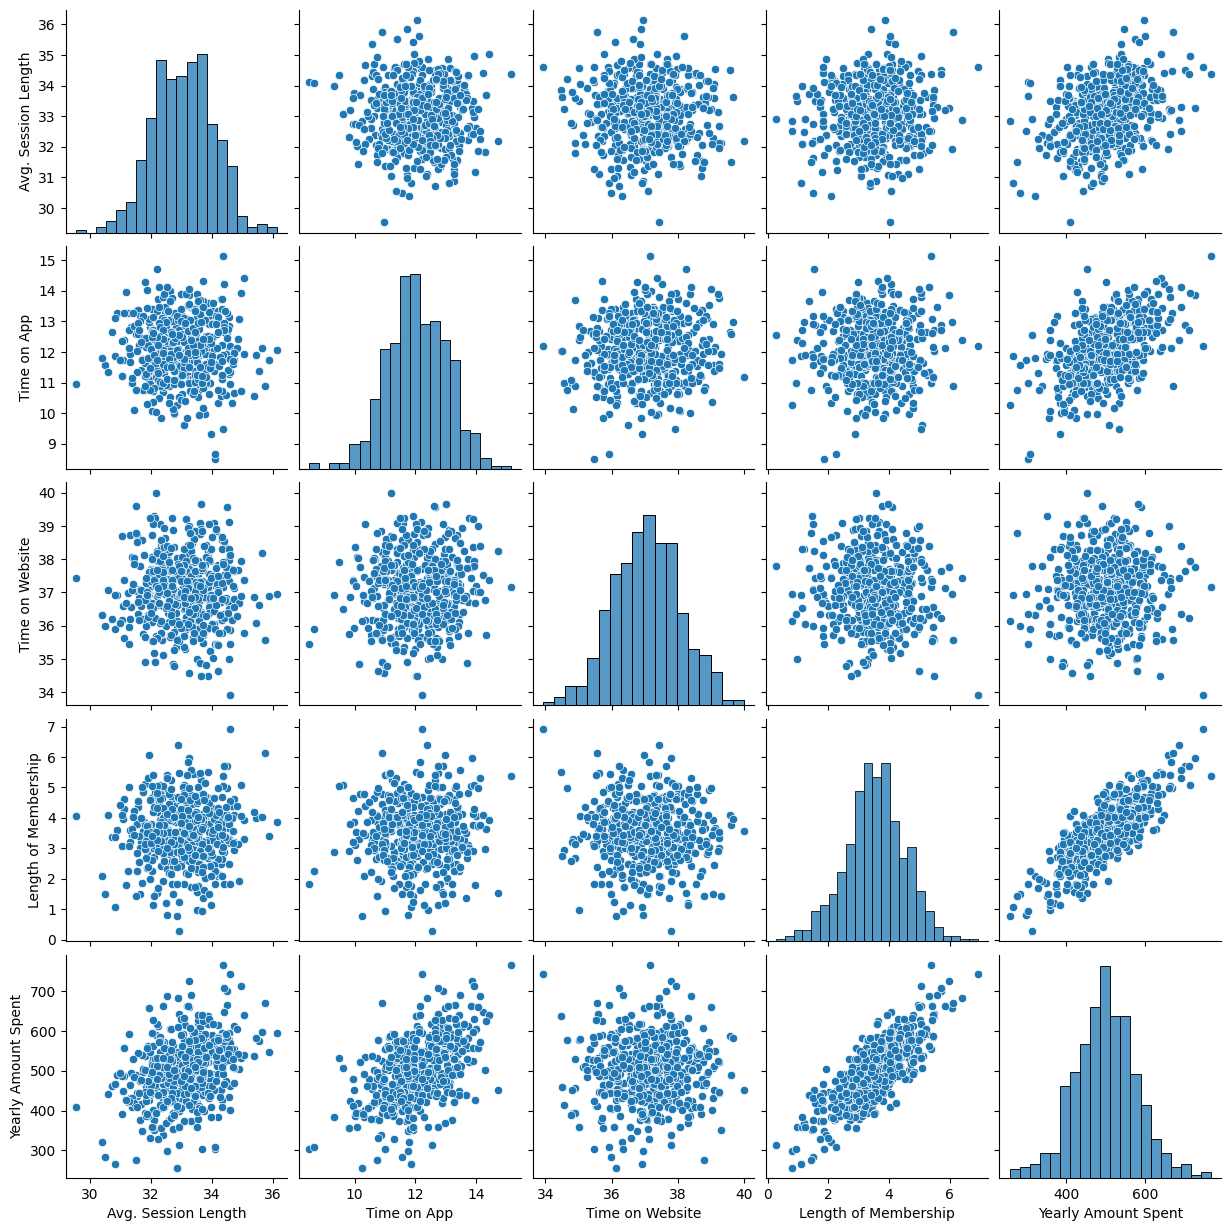

In [146]:
# 

sns.pairplot(df, kind = 'scatter')

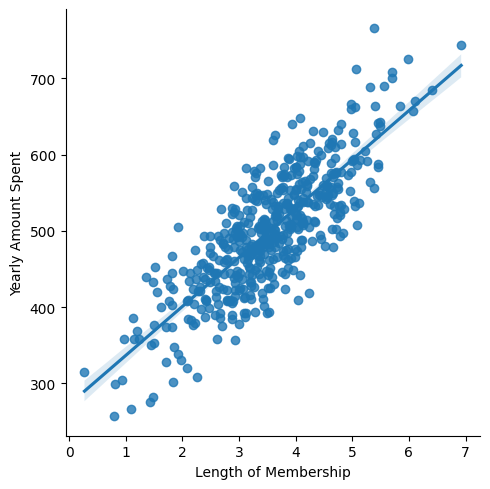

In [147]:

sns.lmplot(x = 'Length of Membership',
          y = 'Yearly Amount Spent',
          data = df)

In [148]:
# histogram 

import matplotlib.pyplot  as plt 

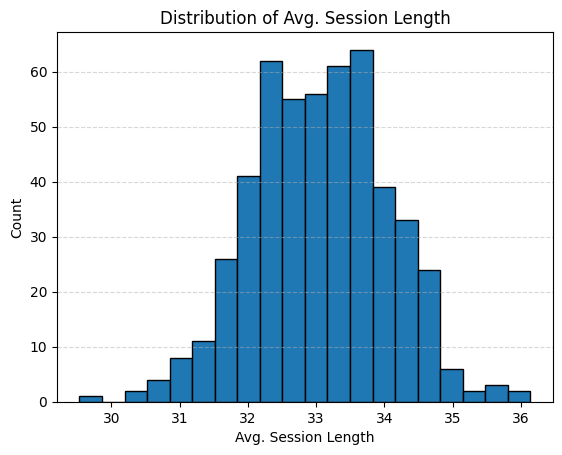

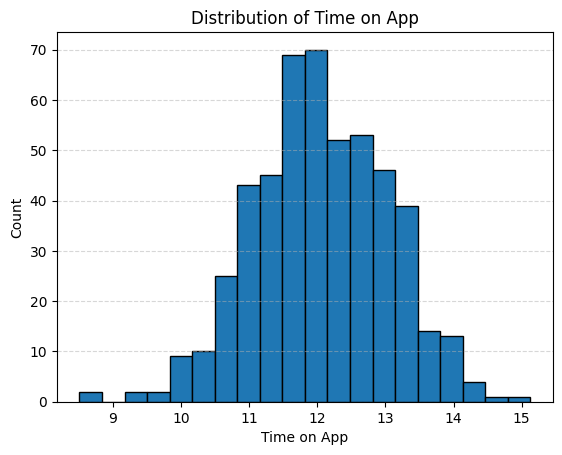

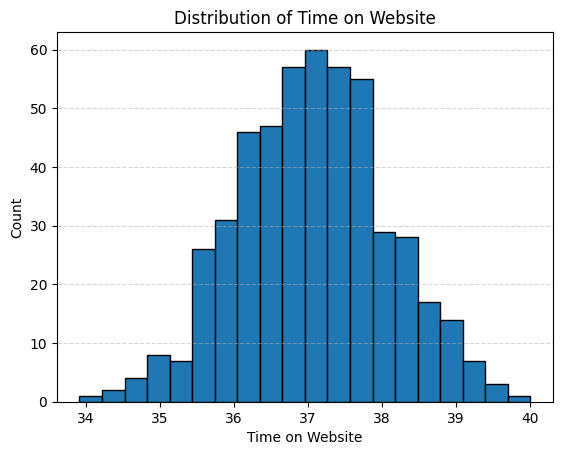

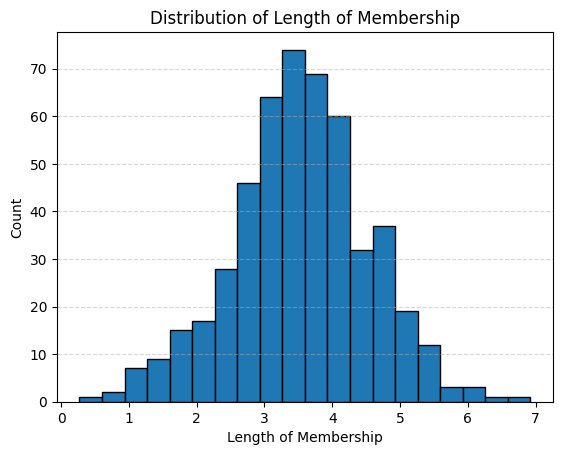

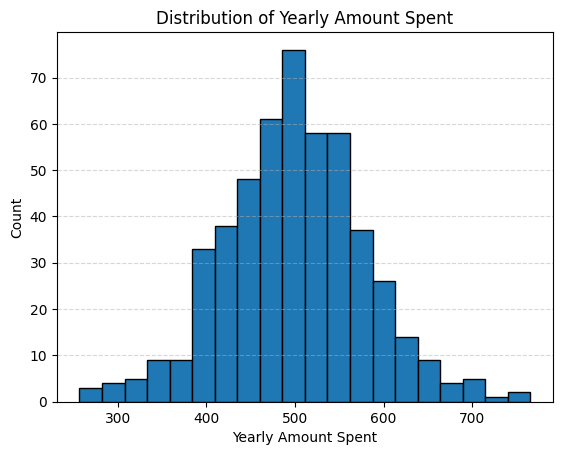

In [149]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()  
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [150]:
'''num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show() '''

"num_cols = df.select_dtypes(include=['int64', 'float64']).columns\n\nfor col in num_cols:\n    plt.figure()\n    plt.boxplot(df[col])\n    plt.title(f'Boxplot of {col}')\n    plt.ylabel(col)\n    plt.grid(axis='y', linestyle='--', alpha=0.5)\n    plt.show() "

In [152]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df_clean = df.copy()  
total_outliers = 0

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    num_outliers = len(outliers)

    total_outliers += num_outliers

    print(f"{col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {num_outliers}")
    print("-" * 40)

    # Remove outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Total Outliers Removed:", total_outliers)
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_clean.shape)


Avg. Session Length
Lower Bound: 30.28657747536273
Upper Bound: 35.767229553109516
Number of Outliers: 3
----------------------------------------
Time on App
Lower Bound: 9.332778078459471
Upper Bound: 14.815003518943657
Number of Outliers: 4
----------------------------------------
Time on Website
Lower Bound: 34.297706257038925
Upper Bound: 39.77716362328482
Number of Outliers: 2
----------------------------------------
Length of Membership
Lower Bound: 1.1428667219770978
Upper Bound: 5.918151207893688
Number of Outliers: 12
----------------------------------------
Yearly Amount Spent
Lower Bound: 297.56775058912245
Upper Bound: 699.4807546149261
Number of Outliers: 5
----------------------------------------
Total Outliers Removed: 26
Original Shape: (500, 8)
Cleaned Shape: (474, 8)


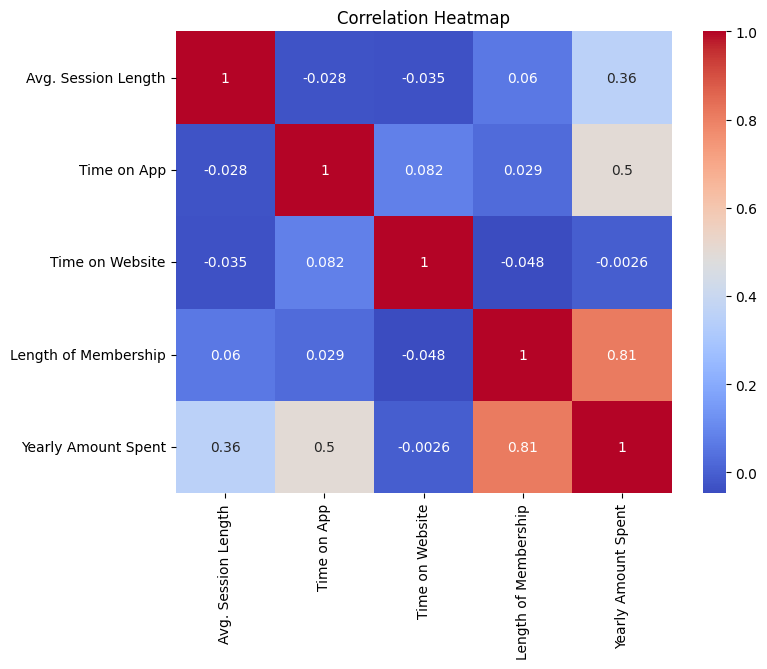

In [153]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [158]:
# split the  x and y 

X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership' ]]
Y = df['Yearly Amount Spent']

In [52]:
# train test split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [53]:
print(X_train.shape )

(400, 3)


In [54]:
print(X_test.shape)

(100, 3)


In [55]:
print(Y_train.shape)

(400,)


In [56]:
print(Y_test.shape)

(100,)


In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
model = LinearRegression()


In [62]:
rfe = RFE(model, n_features_to_select=3)

X_train = rfe.fit_transform(X_train, Y_train)
X_test = rfe.transform(X_test)

In [63]:

selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))


Selected Features: ['Avg. Session Length', 'Time on App', 'Length of Membership']


In [64]:
# model building 

model = LinearRegression()

In [65]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
# coefficient 

model.coef_

array([25.25318844, 38.72931822, 63.52827443])

In [67]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                      Coefficient
Avg. Session Length     25.253188
Time on App             38.729318
Length of Membership    63.528274


In [68]:
# prediction 

y_test_pred = model.predict(X_test)
y_test_pred

array([402.18887221, 542.54472263, 426.23774751, 501.88979068,
       409.30936652, 569.5416207 , 531.89436548, 505.76089698,
       407.88928731, 473.23213855, 441.14389381, 424.24729561,
       425.30087171, 527.3366341 , 430.5369103 , 423.71859029,
       576.09918335, 484.93665698, 457.72038178, 481.57066164,
       501.35391939, 513.1886422 , 507.36882409, 646.42234353,
       449.82110273, 496.78360458, 555.74222616, 555.08336741,
       399.03176797, 325.28751614, 532.82031769, 477.33912579,
       500.82195623, 305.15554557, 505.41344589, 483.88228321,
       519.64514458, 437.99999495, 456.01248746, 470.50619085,
       494.35793073, 444.51261677, 508.784276  , 500.87220394,
       487.81183918, 535.66142829, 593.80146684, 513.56188568,
       279.14202913, 432.23321649, 420.72850482, 480.76601499,
       583.98441927, 608.08432079, 564.65337705, 495.0140608 ,
       394.00789826, 455.82963048, 573.37821092, 498.85968541,
       512.18249359, 391.62379736, 479.37689553, 481.01

<Axes: xlabel='Yearly Amount Spent'>

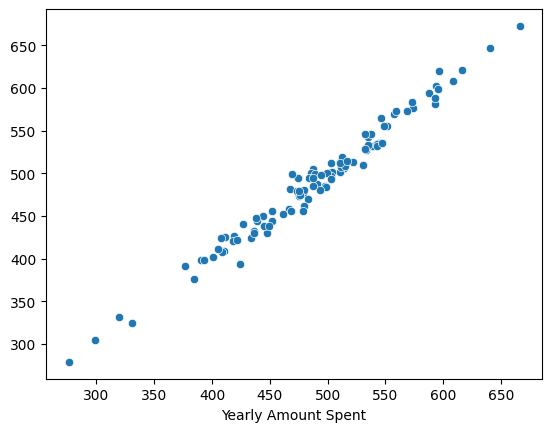

In [69]:
sns.scatterplot(x=Y_test, y=y_test_pred)


In [70]:
import numpy as np 

In [71]:
# evaluation for test dta

print('mae: ', mean_absolute_error(Y_test, y_test_pred))
print('mse: ', mean_squared_error(Y_test, y_test_pred))
print('rmse: ', np.sqrt(mean_squared_error(Y_test, y_test_pred)))
print('r2_score: ', r2_score(Y_test, y_test_pred))


mae:  8.583564848964635
mse:  110.32288587780599
rmse:  10.503470182649446
r2_score:  0.977720338837434


In [72]:
y_train_pred = model.predict(X_train)


In [73]:
print('mae: ', mean_absolute_error(Y_train, y_train_pred))
print('mse: ', mean_squared_error(Y_train, y_train_pred))
print('rmse: ', np.sqrt(mean_squared_error(Y_train, y_train_pred)))
print('r2_score: ', r2_score(Y_train, y_train_pred))

mae:  7.729588231923429
mse:  95.9211999895708
rmse:  9.793936899407244
r2_score:  0.9854090539296939


In [74]:
from sklearn.model_selection import cross_val_score


In [75]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [78]:
scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='r2')

print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())


Cross-validation scores: [0.98740854 0.98579311 0.98345831 0.98499949 0.98284903]
Average CV Score: 0.984901693642396


In [80]:
model.score(X_test, Y_test)

0.977720338837434

In [135]:
import joblib

# Save trained model
joblib.dump(model, "linear_regression_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [81]:
'''
joblib.dump(model, "linear_regression.pkl")
joblib.dump(scaler, "scaler_regression.pkl")
joblib.dump(list(selected_features), "features.pkl")

print("Model and files saved successfully ✅")
'''

'\njoblib.dump(model, "linear_regression.pkl")\njoblib.dump(scaler, "scaler_regression.pkl")\njoblib.dump(list(selected_features), "features.pkl")\n\nprint("Model and files saved successfully ✅")\n'